<a href="https://colab.research.google.com/github/GeraldShin/PyTorch-Debut/blob/master/PyTorch_Debut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#!pip install --trusted-host download.pytorch.org torch==1.4.0+cpu torchvision==0.5.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

#actually it looks like this is now native in Colab, so we don't even have to pip it in

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 127.2MB 56.4MB/s 
     |████████████████████████████████| 5.4MB 37.8MB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0


In [0]:
import torch
import torchvision 
#these are the standard modules for PyTorch

import torch.nn as nn 
import torch.nn.functional as F
import torchvision.transforms as transforms 
#these are the modules that are more commonly used in Machine learning applications 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#these are obv

Because this is a "Hello World" introduction into PyTorch, we're going to be using the infamous MNIST dataset. 

PyTorch has a function called DataLoader which will efficiently build batches and feed in the data in subsets. You can set the size of the batch, typically you see 32/64.

FYI: In the context of machine learning, a tensor is a type of data structure that is highly efficient. 

In [0]:
BATCH_SIZE = 32

transform = transforms.Compose( #This is a list of transformations to apply to the data
    [transforms.ToTensor()]
)

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform) #this will import the data from the datasets built into PyTorch and then apply the transformations to it

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, #reminder: this will load the dataset into the workspace into tensors
                                          shuffle=True, num_workers=2) 

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                      download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=2) 

In [10]:
print(trainset)

print(testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


**Taking a closer look at the transforms.Compose() function**

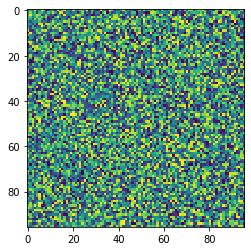

In [16]:
image = transforms.ToPILImage(mode='L')(torch.randn(1, 96, 96))  #this is going to just generate a random image 

plt.imshow(image)

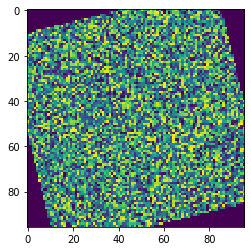

In [19]:
example_transform = transforms.Compose(
    [transforms.RandomRotation(45, fill=(0,)),
     transforms.RandomVerticalFlip()]
    )

example_result = example_transform(image)

plt.imshow(example_result)

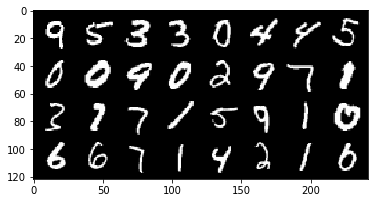

In [21]:
def imshow(img):
  #img = img / 2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
#function to convert the tensor to a numpy array, stack the array using transpose, and then visualize that numpy array

## get randomized training imgs from training dataset
dataiter = iter(trainloader)
images, labels = dataiter.next()


## show images
imshow(torchvision.utils.make_grid(images))

In [29]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape) #believe this means there are 32, 28x28 images?
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
